# Testing Selection Sort  
## MSDS-432 - Kiley - Week 2 Assignment
### Assignment Overview
The mini-programming assignment requires us to implement and test the performance of a sort algorithm manually applied in Python.

The algorithms performance will be measured using Big O notation. <br>
**Big O Notation** is a way to communicate the number of operations required to perform an algorithm in the worst-case scenario.  The number of operations is represented by n.

For selection sort algorithms, the worst-case scenario is when where the list must be run through n items ~1/2 n times.  This requires that the algorithm view all of the data and remove one item each time.

This assignment is git controlled.  The repo was prepared using git bash.

# Setting up working environment, define and test key functions
The packages selected in "In[1]" are all the packages required for the subsequent operations. <br>
They are named based on standard python naming conventions.

In [1]:
# Set up working environment
import numpy as np
import time
import pandas as pd
import matplotlib.pyplot as plt

**Selection Sort** leverages code from *Grokking Algorithms*; the code was sourced from github.
https://github.com/egonSchiele/grokking_algorithms/blob/master/02_selection_sort/python/01_selection_sort.py

Selection sort is not known to be a quick sorting algorithm, and it is known to operate in O(n^2) time.

We will define it as a function so that it may be applied to multiple arrays consistently and quickly.

In [2]:
# Finds the smallest value in an array
def findSmallest(arr):
  # Stores the smallest value
  smallest = arr[0]
  # Stores the index of the smallest value
  smallest_index = 0
  for i in range(1, len(arr)):
    if arr[i] < smallest:
      smallest_index = i
      smallest = arr[i]      
  return smallest_index

# Sort array
def selectionSort(arr):
  newArr = []
  for i in range(len(arr)):
      # Finds the smallest element in the array and adds it to the new array
      smallest = findSmallest(arr)
      newArr.append(arr.pop(smallest))
  return newArr

In [3]:
# Check that linear search works
my_list = [5, 3, 6, 2, 10]

# 'None' means nil in Python. We use to indicate that the item wasn't found.
print(selectionSort(my_list))

[2, 3, 5, 6, 10]


**Results of the test: The algorithm works as expected.** <br>

In [4]:
def gen_array(array): 
    
    # Return the length of the array
    size = len(array)
    
    # Sort
    start = time.time()
    selectionSort([array])
    end = time.time()
    sort_it_time = end-start 
    #Put in milliseconds
    sort_it_time = (round(sort_it_time * 1000, 2))
    
    return [size, sort_it_time]

The assignment has asked that the algorithms be tested at various sizes of generated data.  
To ensure that the same tests are performed on each data set, a function will be generated to capture the requested tests. 

The requested output are:
* Number of values in the dataset
* Time (in milliseconds) to run Selection source

These output will be put into a pandas dataframe called "df". 

A helper function called check_array has been written to test that the arrays were generated properly and view the first five values of each array.

In [5]:
# Print array
# Check the first five values
def check_array(array): 
    print('-----------------------------')
    print('Checks for select array are:')
    print('The len of the array is:', len(array))
    print('First five values')
    print(array[:5])
    print('-----------------------------')

# Generate And Test Random Data Arrays
The random seed generator provided in the project requirements returned the value 922.<br>
Leveraging a seed as such creates reproducable work.<br>
That seed has been set below.

Per the requirements, using a random number generator with a uniform probabilty of each value occuring, generate five arrays of varying lengths.  The varying lengths double in scale.

The requested lengths are:
* 5000
* 10000
* 15000
* 20000
* 25000

The interval for the data was not specified.  I've assumed 0 - 100,000 was acceptable.

In [6]:
# Set Random Seeds
SEED = np.random.seed(922)

# Create array 1, 2, 3, 4, 5
a1 = np.random.uniform(0,100000,5000)
a2 = np.random.uniform(0,100000,10000)
a3 = np.random.uniform(0,100000,15000)
a4 = np.random.uniform(0,100000,20000)
a5 = np.random.uniform(0,100000,25000)

# Check all five arrays
check_array(a1)
check_array(a2)
check_array(a3)
check_array(a4)
check_array(a5)

-----------------------------
Checks for select array are:
The len of the array is: 5000
First five values
[35952.21525531 29502.23884122 89936.94513907 52063.75169795
  2679.78684961]
-----------------------------
-----------------------------
Checks for select array are:
The len of the array is: 10000
First five values
[27381.32591116 55093.39921013 44044.96419899 70531.87323054
 38218.09087982]
-----------------------------
-----------------------------
Checks for select array are:
The len of the array is: 15000
First five values
[39999.53285328 77835.24448715 55224.2777935  88948.53213981
 47206.79779219]
-----------------------------
-----------------------------
Checks for select array are:
The len of the array is: 20000
First five values
[98996.44346143  2869.33715832 62146.32781808 41426.03607946
  1395.28853861]
-----------------------------
-----------------------------
Checks for select array are:
The len of the array is: 25000
First five values
[64353.04458874 94223.4850114

The first five values are unsorted, as expected.  Running the code multiple times produces the same output, meaning that the random seed is functioning correctly.

The data has been successfully generated.

# Run Trials and Create Pandas Data Frame

Most of the work has been completed, this next step passes the generated data to the gen_array function defined previously.  The arrays are then summarized into a pandas data frame for further analysis. 

In [7]:
# Run Trials
trial1 = gen_array(a1)
trial2 = gen_array(a2)
trial3 = gen_array(a3)
trial4 = gen_array(a4)
trial5 = gen_array(a5)

# Create pandas dataframe of trials
df = pd.DataFrame([trial1, trial2, trial3, trial4, trial5], 
                  columns=['len', 'sort_it_time'])

# Print pandas dataframe of trials
print(df)

     len  sort_it_time
0   5000           0.0
1  10000           0.0
2  15000           0.0
3  20000           0.0
4  25000           0.0


Perhaps unfortunately, the computer is able to churn through these problems extremely quickly.  So quickly infact that sort time hardly registers on the scale (which is in milliseconds).  If we were to continue the pattern of the size of the data continuously doubling (which, as the program has been designed would be an easy implementation), we would see even more pronounced results in the differences between the algorithms.

Too see if it would register, I scaled the data up by factors of 10x 100x 1000x.  The algorithm continued to run extremely quickly.

The resulting data frame produces results that are consistent with our expectations.

# Visualize Results

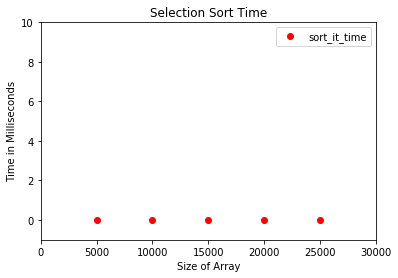

In [8]:
# Create plot of time versus complexity of array

# Plot Binary Time
plt.plot(df['len'], df['sort_it_time'], 'ro')

# Label Graph
plt.ylabel('Time in Milliseconds')
plt.xlabel('Size of Array')
plt.title('Selection Sort Time')

#Create Legend and define axes
plt.legend()
plt.axis([0, 30000, -1, 10])
plt.show()

The resulting graphic for all tests performed as part of this assigment.  
The algorithm operates extremely quickly and hardly takes any time to run.

Data engineers are required to consider how to ensure that an operation can perform effectively at scale.  This exercise helps to reinforce the value of measuring and testing algorithms as they scale.